# 1. DATA EXPLORATION

## Loading libraries

In [166]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## Loading data

In [264]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [168]:
print('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print('---------------------------')
print('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
---------------------------
The test data has 1459 rows and 80 columns


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Check missing values

In [170]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## Percentage of missing values in these columns

In [171]:
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss.sort_values(ascending = True, inplace = True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [172]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Names']
miss['Name'] = miss.index
miss

,count,Name
Names,,
Electrical,0.000685,Electrical
MasVnrType,0.005479,MasVnrType
MasVnrArea,0.005479,MasVnrArea
BsmtQual,0.025342,BsmtQual
BsmtCond,0.025342,BsmtCond
BsmtFinType1,0.025342,BsmtFinType1
BsmtExposure,0.026027,BsmtExposure
BsmtFinType2,0.026027,BsmtFinType2
GarageCond,0.055479,GarageCond


## Plot the missing value

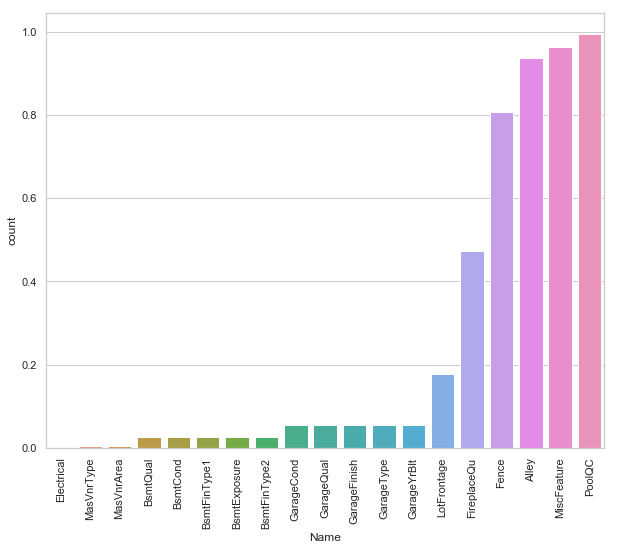

In [173]:
sns.set(style="whitegrid",color_codes=True )
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

## Distribution of target variable SalePrice

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


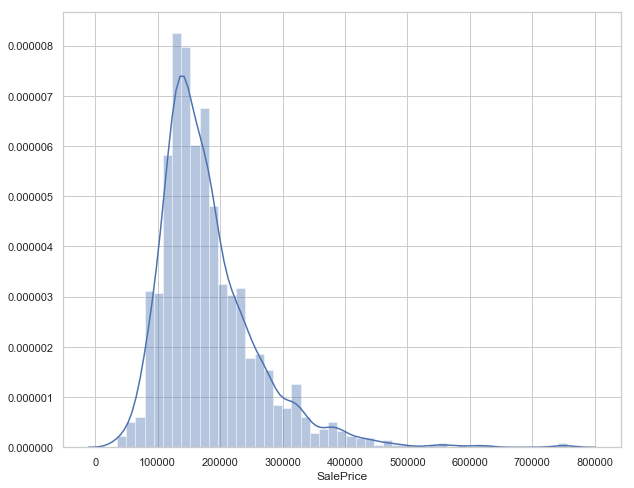

In [174]:
sns.distplot(train['SalePrice'])

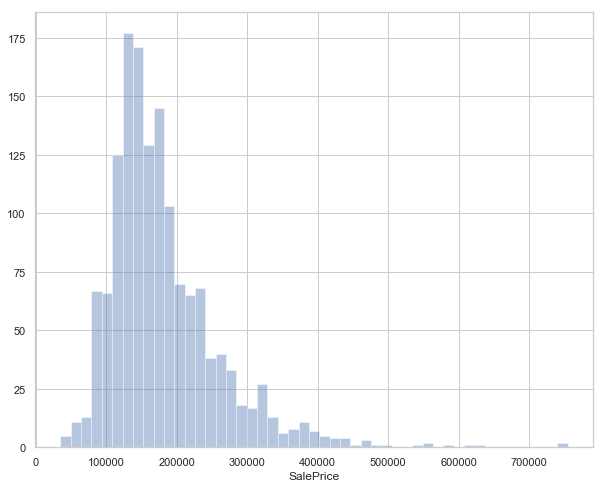

In [175]:
sns.distplot(train['SalePrice'],norm_hist=False,kde=False)

## Removing skewness of target variable

In [176]:
print('The skewness of target variable is {}'.format(train['SalePrice'].skew()))

The skewness of target variable is 1.8828757597682129


Skewness is  0.12133506220520406


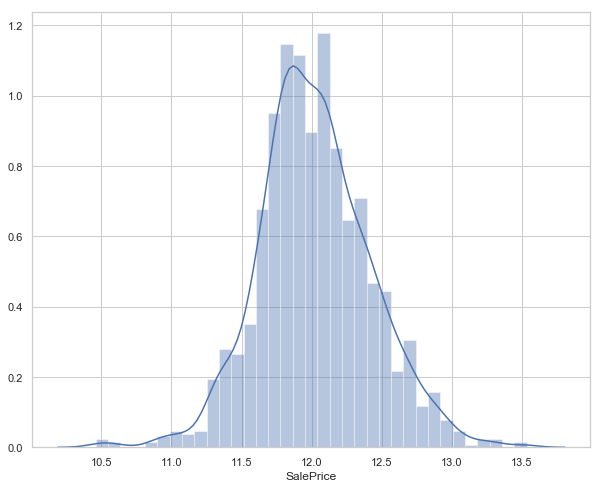

In [177]:
target= np.log(train['SalePrice'])
print('Skewness is ',target.skew())
sns.distplot(target)

## Separate numeric and categorical variables

In [178]:
numeric_data= train.select_dtypes(include=[np.number])
categorical_data=train.select_dtypes(exclude=[np.number])
print('Number of numeric_data {} and Number of categorical_data {}'.format(numeric_data.shape[1],categorical_data.shape[1]))

Number of numeric_data 38 and Number of categorical_data 43


In [179]:
del numeric_data['Id']
print('Number of numeric_data {} and Number of categorical_data {}'.format(numeric_data.shape[1],categorical_data.shape[1]))

Number of numeric_data 37 and Number of categorical_data 43


## Correlation in numeric data

In [180]:
corr=numeric_data.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


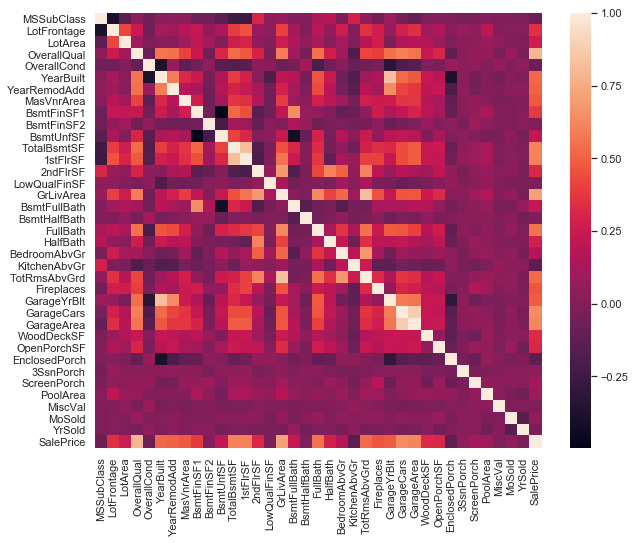

In [181]:
sns.heatmap(corr)

In [182]:
print(corr['SalePrice'].sort_values(ascending=False)[:15])
print('-------------------')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
-------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# Numeric_data analysis
## Analyse OverallQual feature

In [183]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [184]:
pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


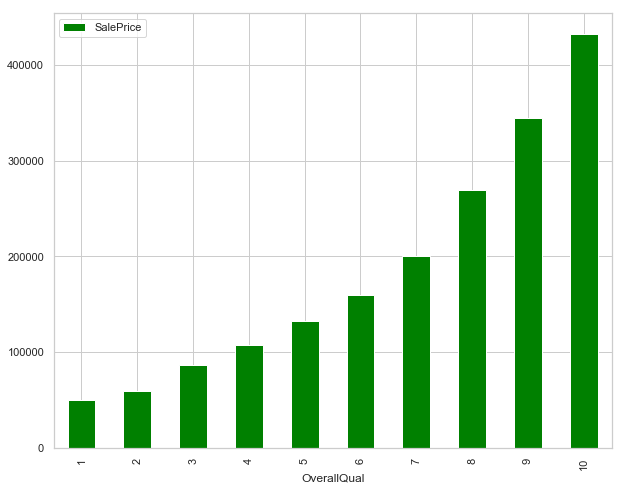

In [185]:
pivot.plot(kind='bar',color='green')

## Analyse GrLiveArea

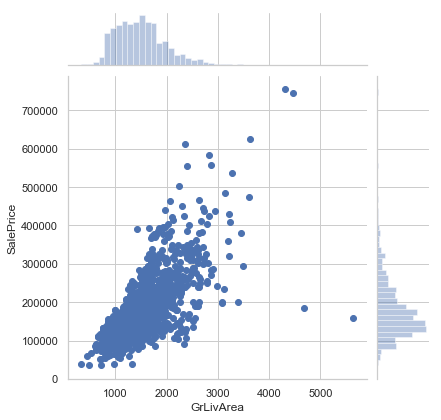

In [186]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=train)

## Analyse GarageCars

In [187]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [188]:
pivot2=train.pivot_table(index='GarageCars',values='SalePrice',aggfunc=np.median)
pivot2

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


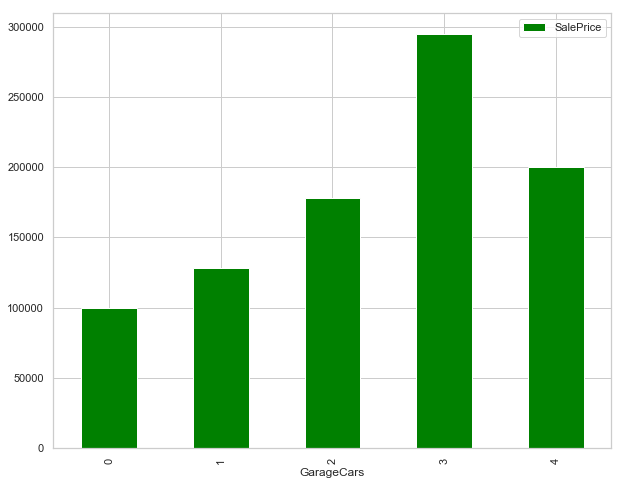

In [189]:
pivot2.plot(kind='bar',color='green')

## Analyse GarageArea 

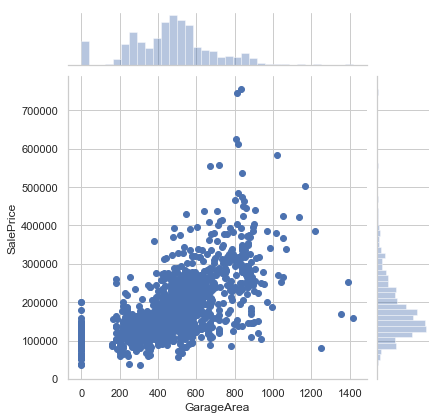

In [190]:
sns.jointplot(x='GarageArea',y='SalePrice',data=train)

# Categorical_data analysis

In [191]:
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Analyse SaleCondition

In [192]:
salecondition_pivot=train.pivot_table(index ='SaleCondition',values='SalePrice',aggfunc=np.median)
salecondition_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


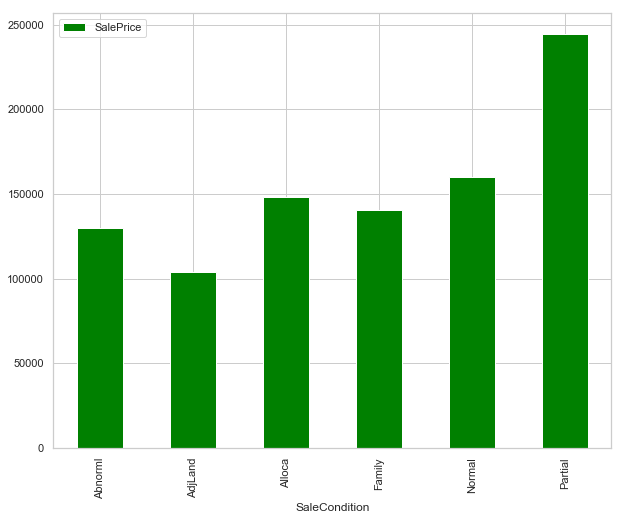

In [193]:
salecondition_pivot.plot(kind='bar',color='green')

## Plots for numeric variables using distribution plots

In [194]:
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd=pd.melt(train,value_vars=num)
nd

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
5,MSSubClass,50.0
6,MSSubClass,20.0
7,MSSubClass,60.0
8,MSSubClass,50.0
9,MSSubClass,190.0


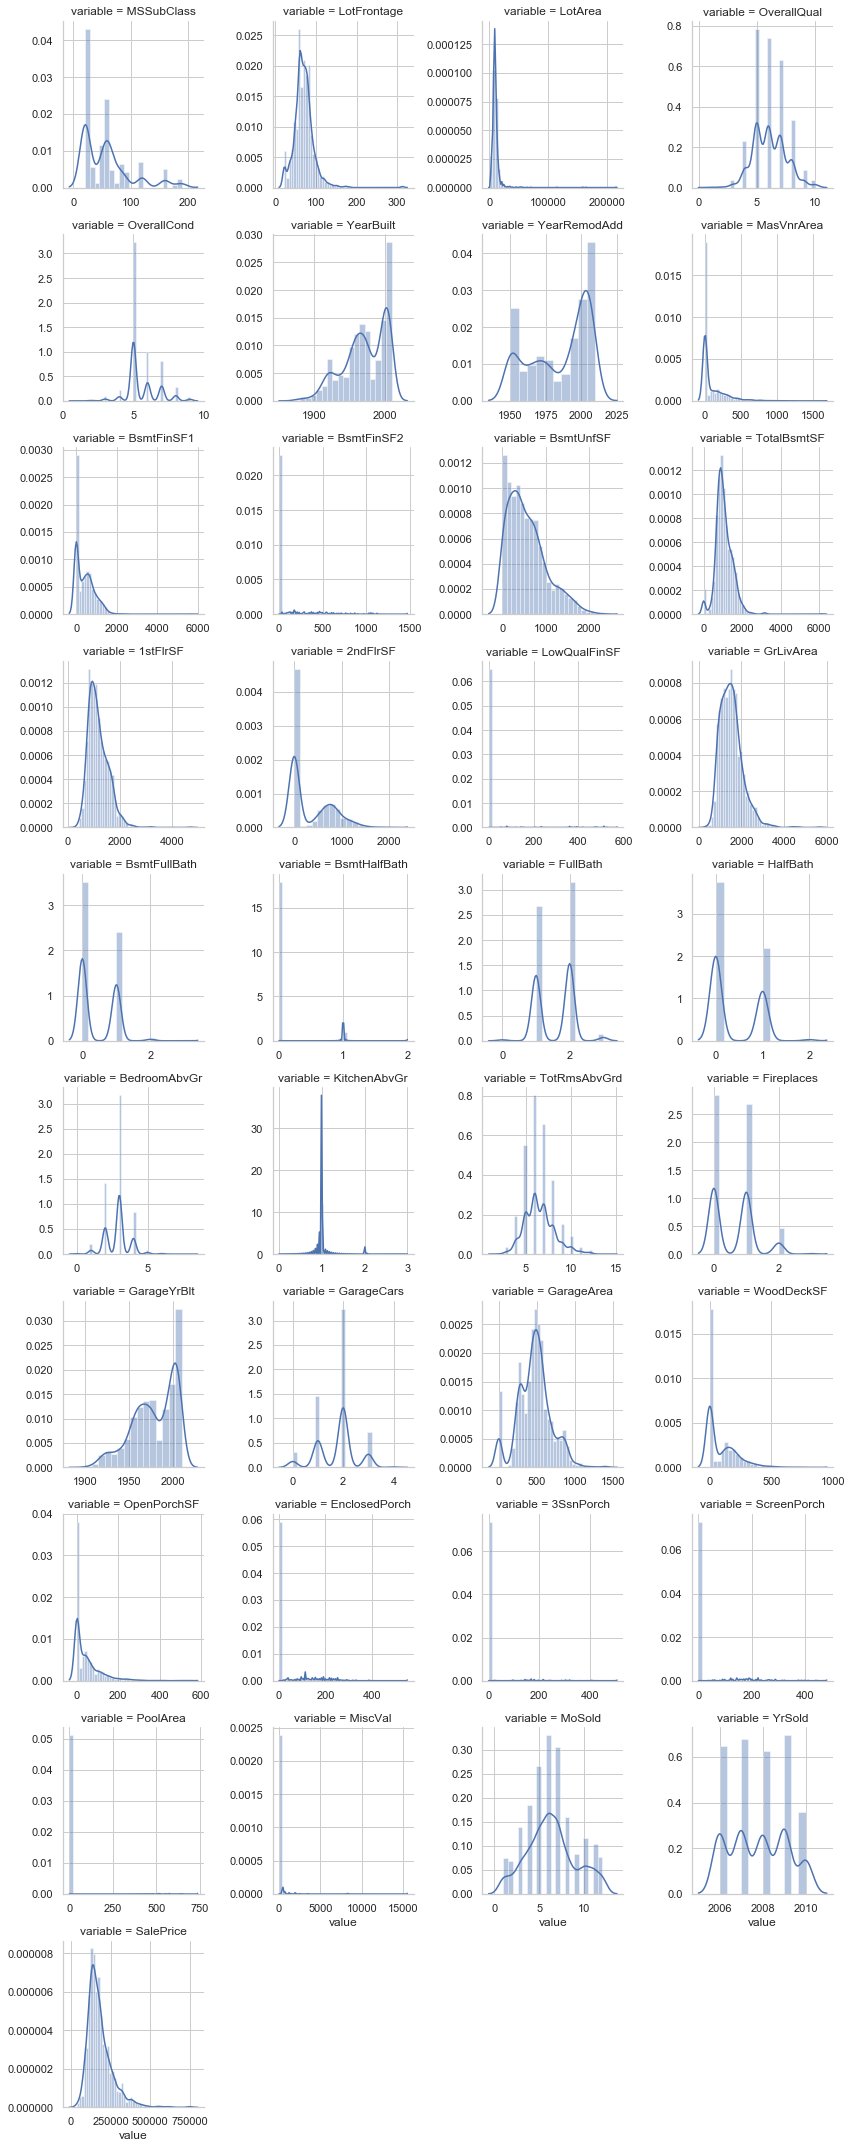

In [195]:
n1= sns.FacetGrid(nd,col='variable',col_wrap=4,sharex=False,sharey=False)
n1=n1.map(sns.distplot, 'value')
n1

## Plots for categorical variables using boxplots

In [196]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
p = pd.melt(train,id_vars='SalePrice', value_vars = cat)
p

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
5,143000,MSZoning,RL
6,307000,MSZoning,RL
7,200000,MSZoning,RL
8,129900,MSZoning,RM
9,118000,MSZoning,RL


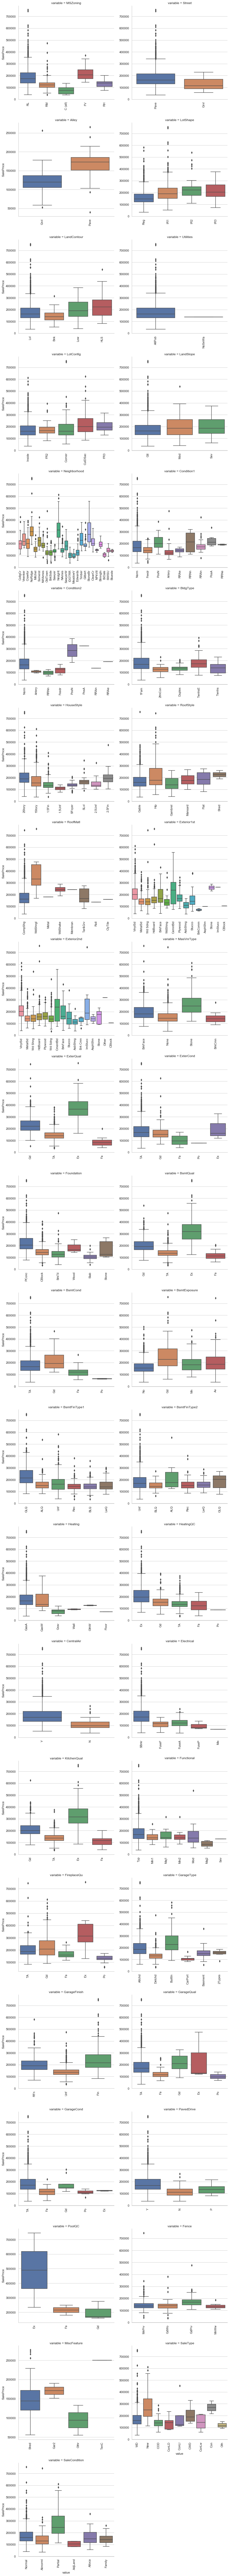

In [197]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
g= sns.FacetGrid(p,col='variable',col_wrap=2,sharex=False,sharey=False,height = 6)
g=g.map(boxplot, 'value','SalePrice')
g

# 2. DATA PRE-PROCESSING

## Removing outliers from GrLivArea

In [198]:
train.drop(train[train['GrLivArea']>4000].index,axis=0,inplace=True)
train.shape

(1456, 81)

## Replacing test dataset NaN values by their mode or median

In [199]:
test['GarageQual'].mode()

0    TA
dtype: object

In [200]:
test['GarageCond'].mode()

0    TA
dtype: object

In [201]:
test['GarageFinish'].mode()

0    Unf
dtype: object

In [202]:
test['GarageYrBlt'].median(axis=0,skipna=True)

1979.0

In [203]:
test.loc[666,'GarageQual']="TA"
test.loc[666,'GarageCond']="TA"
test.loc[666,'GarageFinish']="Unf"
test.loc[666,'GarageYrBlt']= 1979

In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well as there is no meaning of it's value as all related features data are not available.

In [204]:
test.loc[1116,'GarageType']=np.nan

## Combine the dataset

In [205]:
alldata= train.append(test,ignore_index=True)
alldata.shape

F:\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(2915, 81)

## Imputing LotFrontage NaN

In [206]:
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])
for key_neighborhood, lotfrontage_df in lot_frontage_by_neighborhood:
    print("\n")
    print(key_neighborhood)
    print(lotfrontage_df)
    print(lotfrontage_df.median())



Blmngtn
219     43.0
229     43.0
385     43.0
443     53.0
465      NaN
559      NaN
597     53.0
639     53.0
790     43.0
851      NaN
982     43.0
1004    43.0
1019    43.0
1023    43.0
1126    53.0
1394    53.0
1415    51.0
Name: LotFrontage, dtype: float64
43.0


Blueste
599    24.0
956    24.0
Name: LotFrontage, dtype: float64
24.0


BrDale
225     21.0
227     21.0
232     21.0
235     21.0
363     21.0
430     21.0
432     24.0
500     21.0
655     21.0
837     21.0
1029    21.0
1104    24.0
1219    21.0
1291    21.0
1334    24.0
1378    21.0
Name: LotFrontage, dtype: float64
21.0


BrkSide
9        50.0
15       51.0
29       60.0
51       52.0
77       50.0
146      51.0
149       NaN
184      92.0
250      55.0
275      55.0
289      60.0
328       NaN
345      65.0
361       NaN
393       NaN
437      50.0
442      52.0
459       NaN
497      60.0
522      50.0
531      60.0
533      50.0
546      70.0
555      58.0
584      51.0
586      55.0
589      50.0
636      51.0

In [207]:
for key, lot_df in lot_frontage_by_neighborhood:
    idx = (alldata['Neighborhood']==key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx,'LotFrontage']=lot_df.median()

In [208]:
alldata['LotFrontage'].isnull().any()

False

## Imputing missing values in numeric_variables

In [209]:
numeric_var = alldata.select_dtypes(include=[np.number])
del numeric_var['SalePrice']
numeric_var.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


In [210]:
numeric_var.columns[numeric_var.isnull().any()]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'MasVnrArea', 'TotalBsmtSF'],
      dtype='object')

In [211]:
alldata["BsmtFinSF1"].fillna(0,inplace=True)
alldata["BsmtFinSF2"].fillna(0,inplace=True)
alldata["BsmtFullBath"].fillna(0,inplace=True)
alldata["BsmtHalfBath"].fillna(0,inplace=True)
alldata["BsmtUnfSF"].fillna(0,inplace=True)
alldata["GarageArea"].fillna(0,inplace=True)
alldata["GarageCars"].fillna(0,inplace=True)
alldata["GarageYrBlt"].fillna(0,inplace=True)
alldata["MasVnrArea"].fillna(0,inplace=True)
alldata["TotalBsmtSF"].fillna(0,inplace=True)

In [212]:
numeric_var = alldata.select_dtypes(include=[np.number])
del numeric_var['SalePrice']
numeric_var.columns[numeric_var.isnull().any()]

Index([], dtype='object')

## Finding List of categorical Variables

In [213]:
categorical_var = [f for f in alldata.columns if alldata.dtypes[f] == 'object']
categorical_var

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

## Quality variable as ordinal variables

In [214]:
Qual_dict={np.nan: 0,"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
name = np.array(['ExterQual' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond','PoolQC'])
for i in name:
    alldata[i] = alldata[i].map(Qual_dict).astype(int)

In [215]:
categorical_var = [f for f in alldata.columns if alldata.dtypes[f] == 'object']
categorical_var

['Alley',
 'BldgType',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'Functional',
 'GarageFinish',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

## Other Ordinal Variables

In [216]:
alldata['BsmtExposure']=alldata['BsmtExposure'].map({np.nan:0, "No":1, "Mn":2, "Av":3, "Gd":4}).astype(int)

In [217]:
alldata['BsmtFinType1']=alldata['BsmtFinType1'].map({np.nan:0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}).astype(int)
alldata['BsmtFinType2']=alldata['BsmtFinType2'].map({np.nan:0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}).astype(int)

In [218]:
alldata['Fence']=alldata['Fence'].map({np.nan:0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}).astype(int)

In [219]:
alldata['Functional']=alldata['Functional'].map({np.nan:0, "Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}).astype(int)

In [220]:
alldata['GarageFinish']=alldata['GarageFinish'].map({np.nan:0, "Unf":1, "RFn":2, "Fin":3}).astype(int)

In [221]:
alldata['CentralAir']=alldata['CentralAir'].map({"N":0, "Y":1}).astype(int)

In [222]:
categorical_var = [f for f in alldata.columns if alldata.dtypes[f] == 'object']
categorical_var

['Alley',
 'BldgType',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

## Encoding function for non_ordinal variables

In [223]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encoder(data,var,fill_na=None):
    if fill_na is not None:
        data[var].fillna(fill_na,inplace=True)
    le.fit(data[var])
    data[var]=le.transform(data[var])
    return data

### Encoding columns with no Nan values

In [224]:
for item in categorical_var:
    print(item,'==>',alldata[item].isnull().any())

Alley ==> True
BldgType ==> False
Condition1 ==> False
Condition2 ==> False
Electrical ==> True
Exterior1st ==> True
Exterior2nd ==> True
Foundation ==> False
GarageType ==> True
Heating ==> False
HouseStyle ==> False
LandContour ==> False
LandSlope ==> False
LotConfig ==> False
LotShape ==> False
MSZoning ==> True
MasVnrType ==> True
MiscFeature ==> True
Neighborhood ==> False
PavedDrive ==> False
RoofMatl ==> False
RoofStyle ==> False
SaleCondition ==> False
SaleType ==> True
Street ==> False
Utilities ==> True


In [225]:
No_Nan = np.array(['BldgType','Condition1','Condition2','Foundation','Heating','HouseStyle','LandContour','LandSlope','LotConfig','LotShape','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition','Street'])
for i in No_Nan:
    alldata = encoder(alldata,i)

### Encoding columns with Nan values

In [226]:
for item in categorical_var:
    print(item,'==>',alldata[item].isnull().any())

Alley ==> True
BldgType ==> False
Condition1 ==> False
Condition2 ==> False
Electrical ==> True
Exterior1st ==> True
Exterior2nd ==> True
Foundation ==> False
GarageType ==> True
Heating ==> False
HouseStyle ==> False
LandContour ==> False
LandSlope ==> False
LotConfig ==> False
LotShape ==> False
MSZoning ==> True
MasVnrType ==> True
MiscFeature ==> True
Neighborhood ==> False
PavedDrive ==> False
RoofMatl ==> False
RoofStyle ==> False
SaleCondition ==> False
SaleType ==> True
Street ==> False
Utilities ==> True


In [227]:
alldata['Alley'].mode()

0    Grvl
dtype: object

In [228]:
alldata['Electrical'].mode()

0    SBrkr
dtype: object

In [229]:
alldata['Exterior1st'].mode()

0    VinylSd
dtype: object

In [230]:
alldata['Exterior2nd'].mode()

0    VinylSd
dtype: object

In [231]:
alldata['GarageType'].mode()

0    Attchd
dtype: object

In [232]:
alldata['MiscFeature'].mode()

0    Shed
dtype: object

In [233]:
alldata['MSZoning'].mode()

0    RL
dtype: object

In [234]:
alldata['MasVnrType'].mode()

0    None
dtype: object

In [235]:
alldata['SaleType'].mode()

0    WD
dtype: object

In [236]:
alldata['Utilities'].mode()

0    AllPub
dtype: object

In [237]:
alldata = encoder(alldata, "Alley", "Grvl")
alldata = encoder(alldata,"Electrical","SBrkr")
alldata = encoder(alldata, "Exterior1st", "VinylSd")
alldata = encoder(alldata, "Exterior2nd", "VinylSd")
alldata = encoder(alldata, "GarageType", "Attchd")
alldata = encoder(alldata, "MiscFeature", "Shed")
alldata = encoder(alldata, "MSZoning", "RL")
alldata = encoder(alldata, "MasVnrType", "None")
alldata = encoder(alldata, "SaleType", "WD")  
alldata = encoder(alldata, "Utilities", "AllPub")

In [238]:
categorical_var = [f for f in alldata.columns if alldata.dtypes[f] == 'object']
for item in categorical_var:
    print(item,'==>',alldata[item].isnull().any())

# 3. Feature Engineering

In [239]:
# Near zero variance variables are used to create binary variables depicting the presence or absence of a category which 
# has >90% of the values.
#Categorical variables
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsAllPublic"] = (alldata["Utilities"] == "AllPub") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsCentralAirYes"] = (alldata["CentralAir"] == "Y") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["PoolQCExterior"] = (alldata["PoolQC"] == "Ex") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1

F:\Anaconda\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [240]:
#Numerical variables
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasBsmtFinSF2"] = (alldata["BsmtFinSF2"] == 0) * 1
alldata["HasLowQualFinSF"] = (alldata["LowQualFinSF"] == 0) * 1
alldata["HasBsmtHalfBath"] = (alldata["BsmtHalfBath"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1
alldata["HasPoolArea"] = (alldata["PoolArea"] == 0) * 1
alldata["HasMiscVal"] = (alldata["MiscVal"] == 0) * 1

In [241]:
alldata.shape

(2915, 90)

### Split the data into test and train

In [242]:
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

print (train_new.shape)
print ('----------------')
print (test_new.shape)

(1456, 90)
----------------
(1459, 90)


In [243]:
train_n = pd.get_dummies(train_new)

train_x = train_n.drop('SalePrice', axis = 1)
index = train_x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x, columns = index)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# 4.Model Training and Evaluation

### Create label set for train

In [244]:
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 90)
Test set size: (1459, 90)


### Create label set for test

In [245]:
result_df = pd.DataFrame(index = test_new.index, columns = ['SalePrice'])
result_df['SalePrice'] = np.log(result_df['SalePrice'].astype('float64'))

### Calculate root mean square error

In [246]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

### Lasso regression

In [253]:
from sklearn.linear_model import Lasso
best_alpha = 0.0001
train_new = train_new.replace([np.inf, -np.inf], 0).fillna(0)
label_df = label_df.replace([np.inf, -np.inf], 0).fillna(0)
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_x, label_df)
y_pred = regr.predict(train_x)
y_test = label_df
print("Score on training set: ", rmse(y_test, y_pred))
print("R2 Score on training set:", regr.score(train_x,label_df))

Score on training set:  0.11168654451016678
R2 Score on training set: 0.920432703533178


In [254]:
from sklearn.metrics import r2_score
rs = r2_score(y_test,y_pred)
rs

0.920432703533178

In [268]:
test_n = pd.get_dummies(test_new)

test_x = test_n.drop('SalePrice', axis = 1)
index = test_x.columns
scaler = StandardScaler()
test_x = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_x, columns = index)
y_pred_lasso = regr.predict(test_x)
y_pred_lasso=np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_lasso})
pred1.to_csv('lasso_model.csv', header=True, index=False)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
